# Coursework Part 1: SVMs

## Imports and Data

I have included the minimal sufficient imports to complete the coursework. You are welcome to import other modules.

Don't worry massively about code throwing warnings for this work.

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(4)
X = rng.uniform(0, 5, 20).reshape(-1, 1)
y = np.sin((X[:, 0] - 2.5) ** 2) + 0.5*np.sin(3*X[:,0])+np.random.normal(0,0.01,size=X.shape[0])
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=rng)
del X,y

## 1) Gaussian Process Regression
### a) Plot the train data points with blue markers and the test data points as red markers over an x range from 0 to 10

(0.0, 10.0)

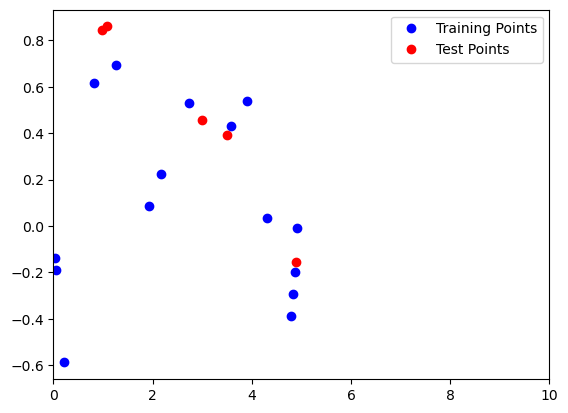

In [26]:
plt.figure()
plt.plot(X_train, y_train, "bo", label="Training Points")
plt.plot(X_test, y_test, "ro", label="Test Points")
plt.legend()
plt.xlim(0, 10)

### b) Compare the prior distribution of functions of a Gaussian Process Regressor with an WhiteKernel, DotProduct cubed!, RationalQuadratic, and RBF Kernel and overlay the train and/or test data

You will need to:
- make an instance of gaussianprocessregressor
- use its sample_y function for a range of x values from 0 to 5 for n_samples 3-5. Each column of the output can be considered a sample function.
- make some observations
- for rq and rbf kernel use parameters: length_scale=1.0, length_scale_bounds=(1e-1, 10.0)
- for DotProduct use DotProduct()**3

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

kernel_names = []
kernel_list = [kernels.WhiteKernel(), kernels.WhiteKernel()**3, kernels.RationalQuadratic(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), kernels.RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))]
# kernels can be combined by performing a point-wise addition of values, and a much more accurate kernel can be constructed.
kernel = kernels.WhiteKernel() + kernels.DotProduct()**3 + kernels.RationalQuadratic(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)) + kernels.RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

gpr = GaussianProcessRegressor(kernel=kernel, random_state=rng)

X_sample = np.arange(0,5,0.005).reshape(-1, 1)
y_sample = gpr.sample_y(X_sample, 3, rng)

(0.0, 5.0)

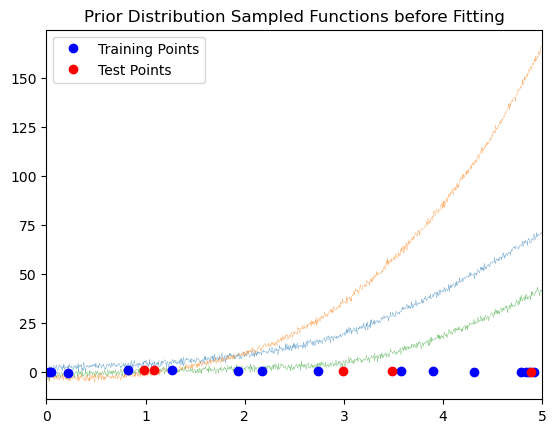

In [28]:
plt.figure()
plt.plot(X_sample, y_sample, lw=0.2)
plt.plot(X_train, y_train, "bo", label="Training Points")
plt.plot(X_test, y_test, "ro", label="Test Points")
plt.legend()
plt.title("Prior Distribution Sampled Functions before Fitting")
plt.xlim(0, 5)

In [29]:
print("The Prior distributions are simply provided by the default kernel values as inputted to the model, and have not been fit to the data as of yet. The prior has a far higher magnitude than the test and training data.")

The Prior distributions are simply provided by the default kernel values as inputted to the model, and have not been fit to the data as of yet. The prior has a far higher magnitude than the test and training data.


### c) Repeat b) but after fitting to the y_train data and comment!

In [30]:
gpr.fit(X_train, y_train)
y_sample = gpr.sample_y(X_sample, 3, rng)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__kernel__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


(0.0, 5.0)

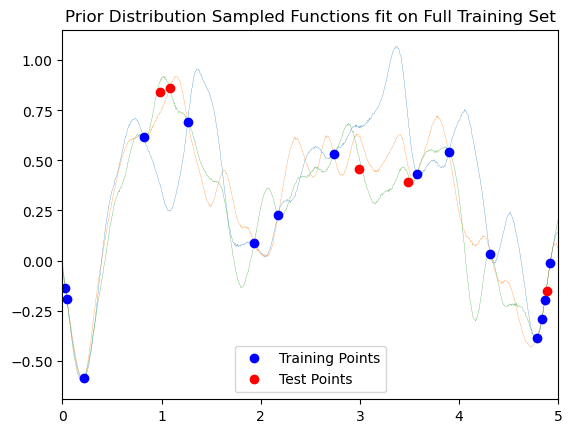

In [31]:
plt.figure()
plt.plot(X_sample, y_sample, lw=0.2)
plt.plot(X_train, y_train, "bo", label="Training Points")
plt.plot(X_test, y_test, "ro", label="Test Points")
plt.legend()
plt.title("Prior Distribution Sampled Functions fit on Full Training Set")
plt.xlim(0, 5)

In [32]:
print("The prior distribution now fits the training and test data much more effectively. It's magnitude is much more similar to that of the actual data and each of the sampled curves from the distribution follows a similar path to the actual data.")

The prior distribution now fits the training and test data much more effectively. It's magnitude is much more similar to that of the actual data and each of the sampled curves from the distribution follows a similar path to the actual data.


### d) For the rbf kernel, repeat c for different sized subsamples of the training data and comment!

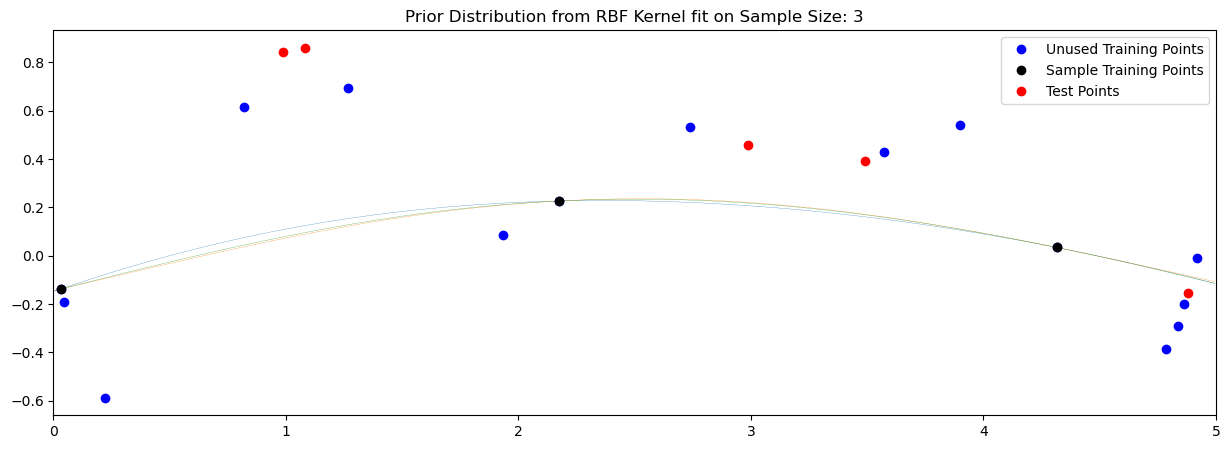

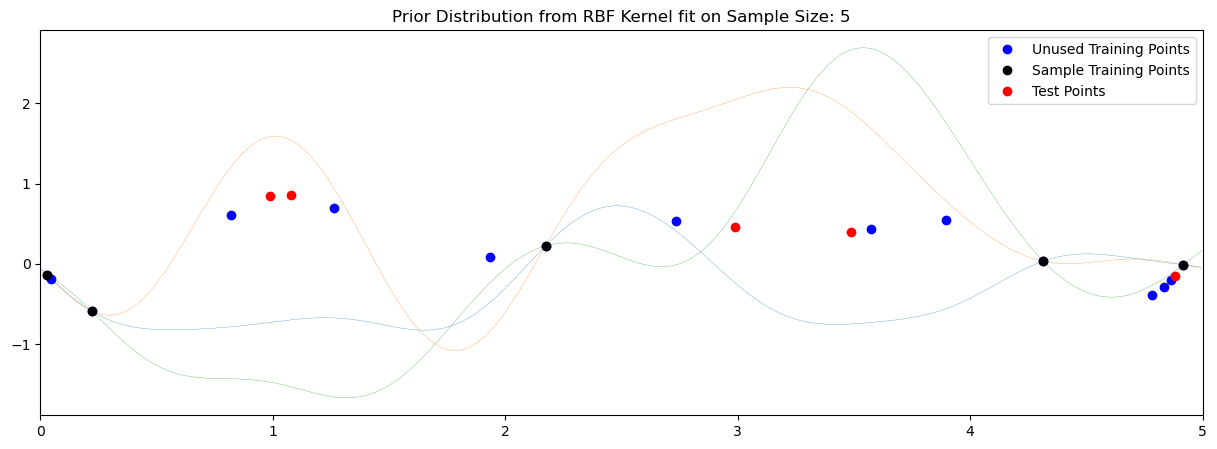

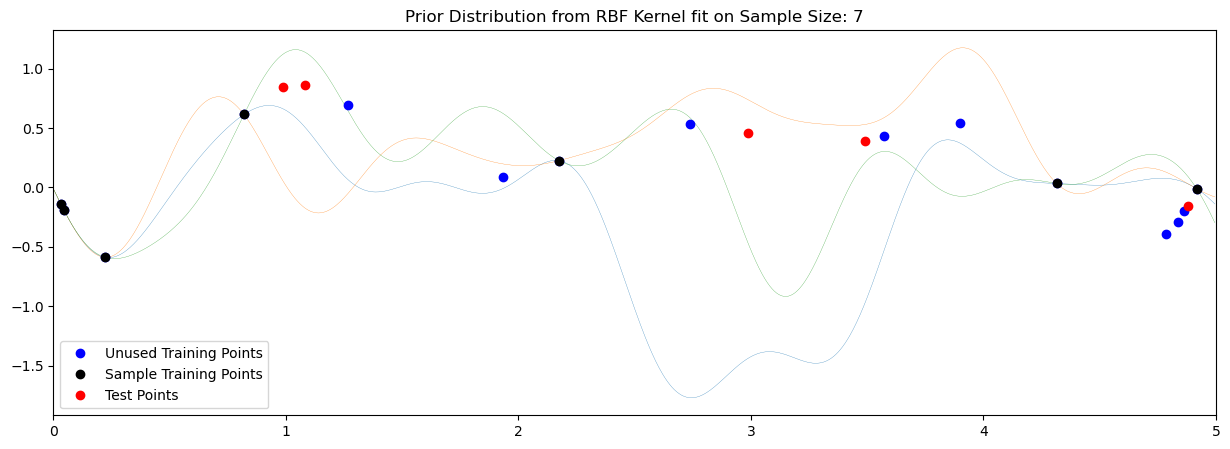

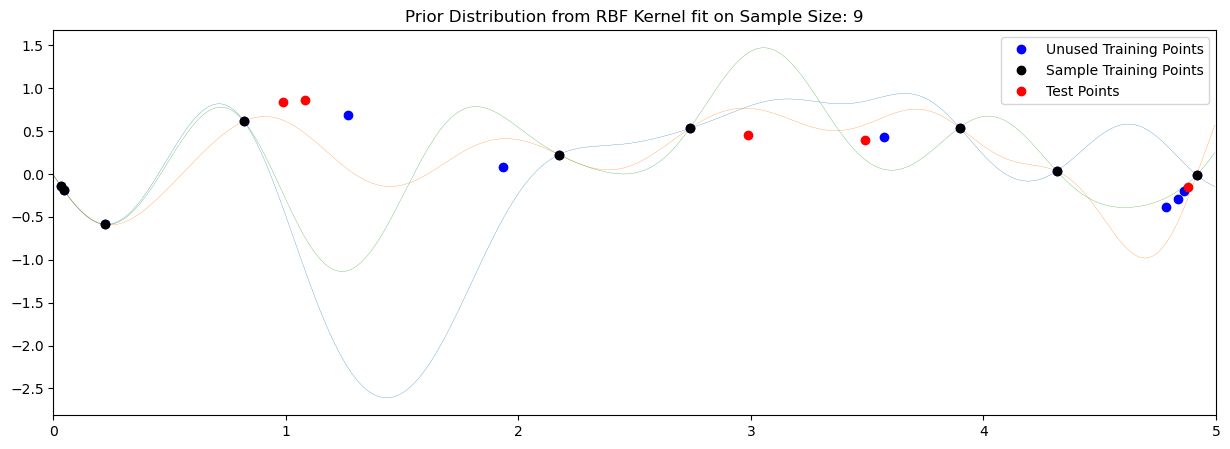

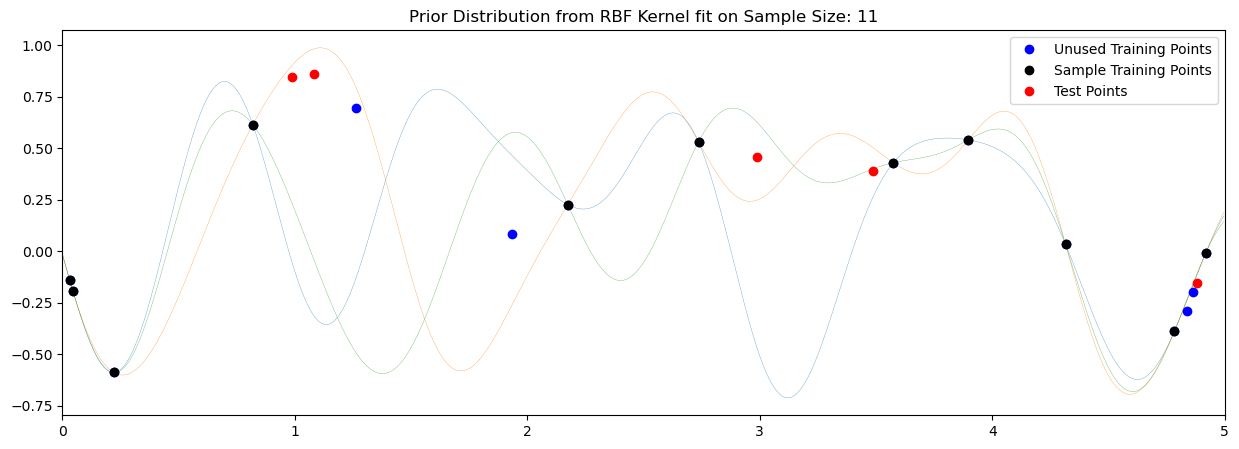

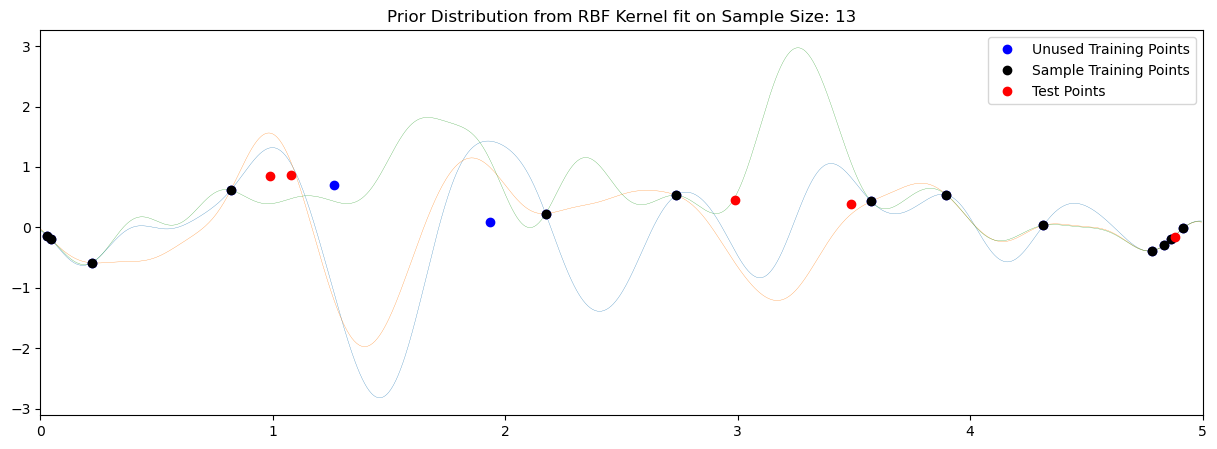

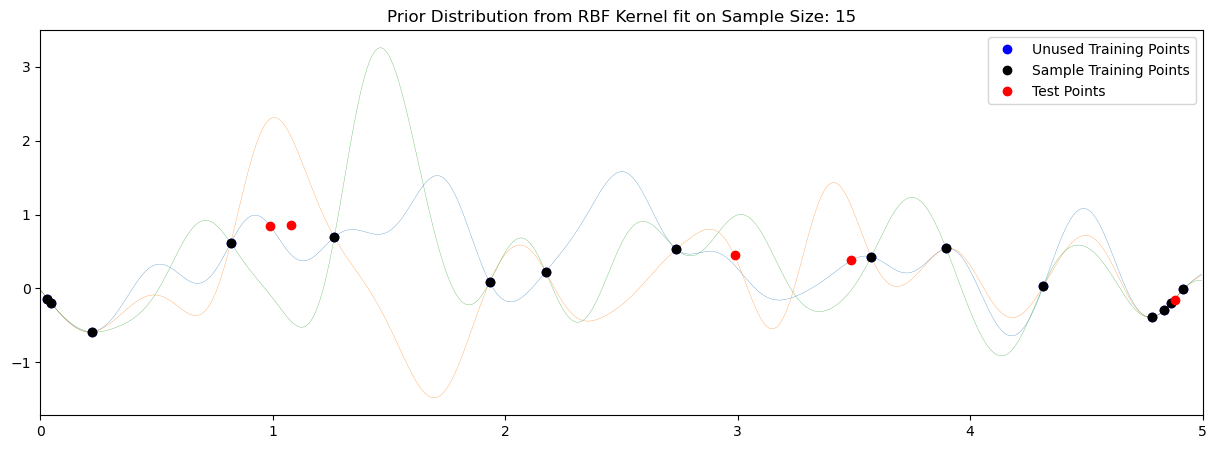

In [33]:
full_size = len(X_train)
subsample_sizes =  range(3, full_size+1, 2)
X_sample = np.arange(0,5,0.005).reshape(-1, 1)

for size in subsample_sizes:
    model = GaussianProcessRegressor(kernel=kernels.RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), random_state=rng)

    X_sample_train = X_train[:size]
    y_sample_train = y_train[:size]

    model.fit(X_sample_train, y_sample_train)
    y_sample = model.sample_y(X_sample, 3, rng)

    plt.figure(figsize=(15,5)) #making wider so more visible
    plt.plot(X_sample, y_sample, lw=0.2)
    plt.plot(X_train, y_train, "bo", label="Unused Training Points")
    plt.plot(X_sample_train, y_sample_train, "ko", label="Sample Training Points")
    plt.plot(X_test, y_test, "ro", label="Test Points")
    plt.legend()
    plt.title(f"Prior Distribution from RBF Kernel fit on Sample Size: {size}")
    plt.xlim(0, 5)

In [34]:
print("The initial few sampled prior distribution functions all are quite inaccurate, but become more and more closely matching to the data as the algorithm acquires more points of interest along the x-axis. Interesting to note that certain sections of the data, eg. the tail at X > 4.5 or at X <0.5, are fit very closely by all sampled functions at around sample size 9")

The initial few sampled prior distribution functions all are quite inaccurate, but become more and more closely matching to the data as the algorithm acquires more points of interest along the x-axis. Interesting to note that certain sections of the data, eg. the 


## 2) Regularisation
### a) For alpha between 10^-3 and 10^-1 demonstrate the effect of the regularisation parameter alpha and comment

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\

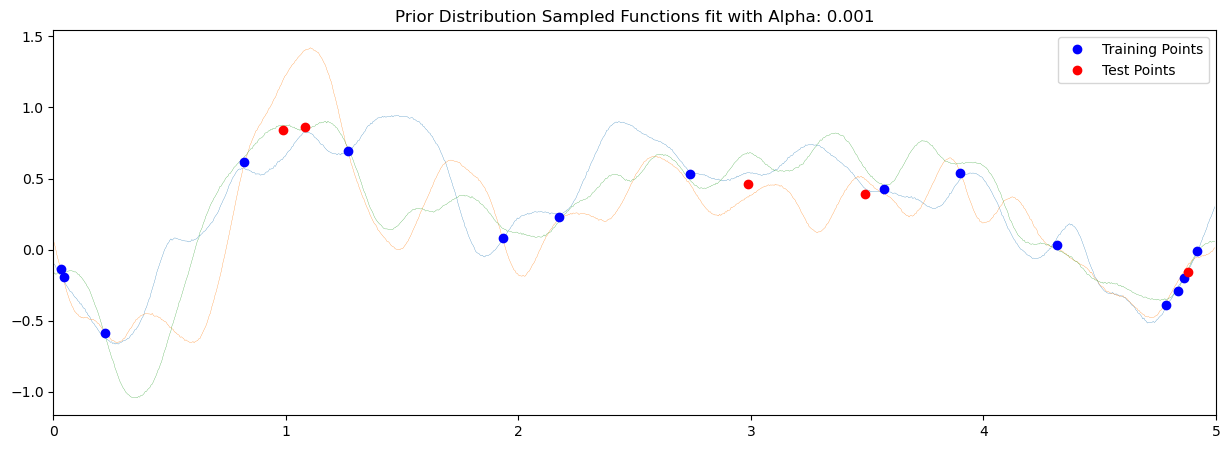

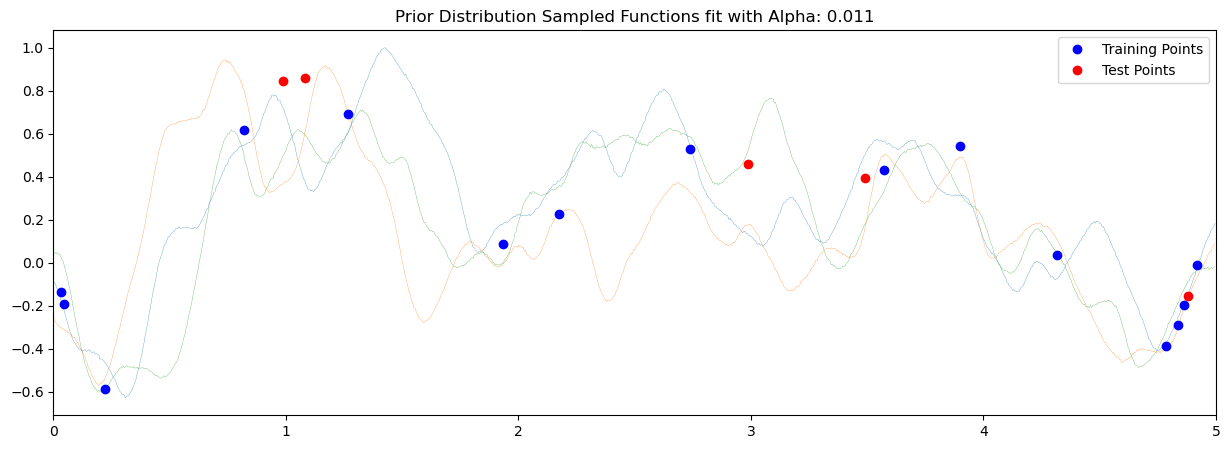

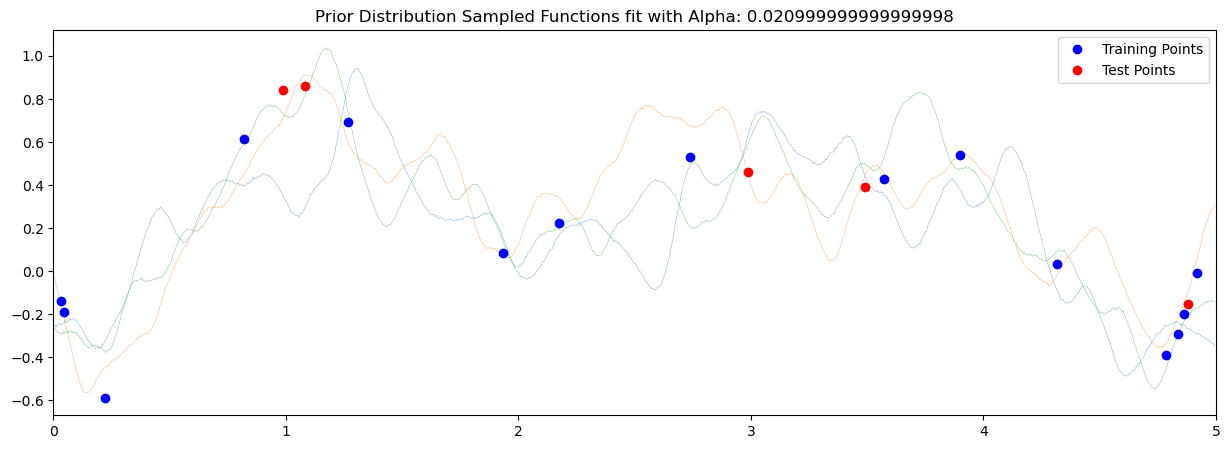

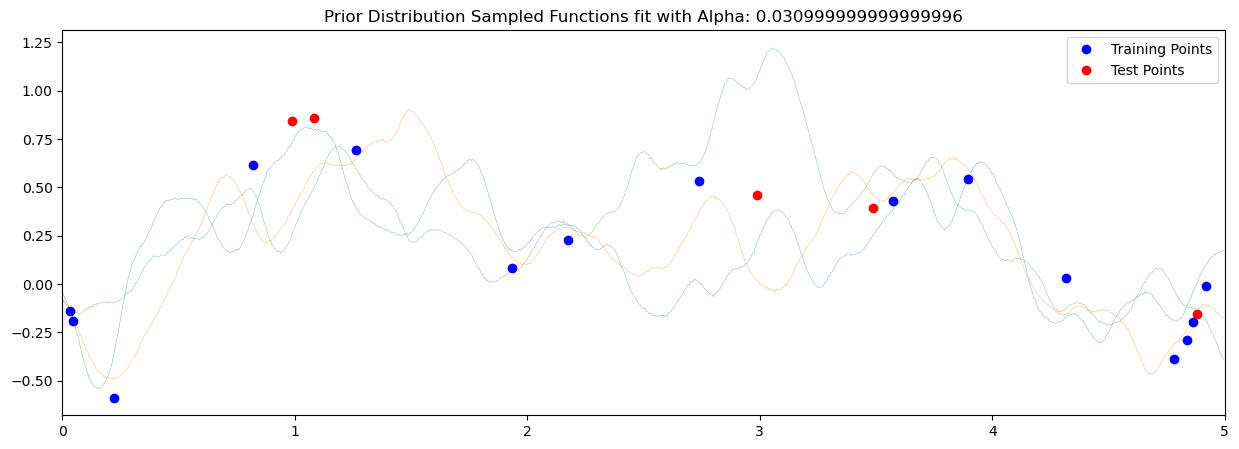

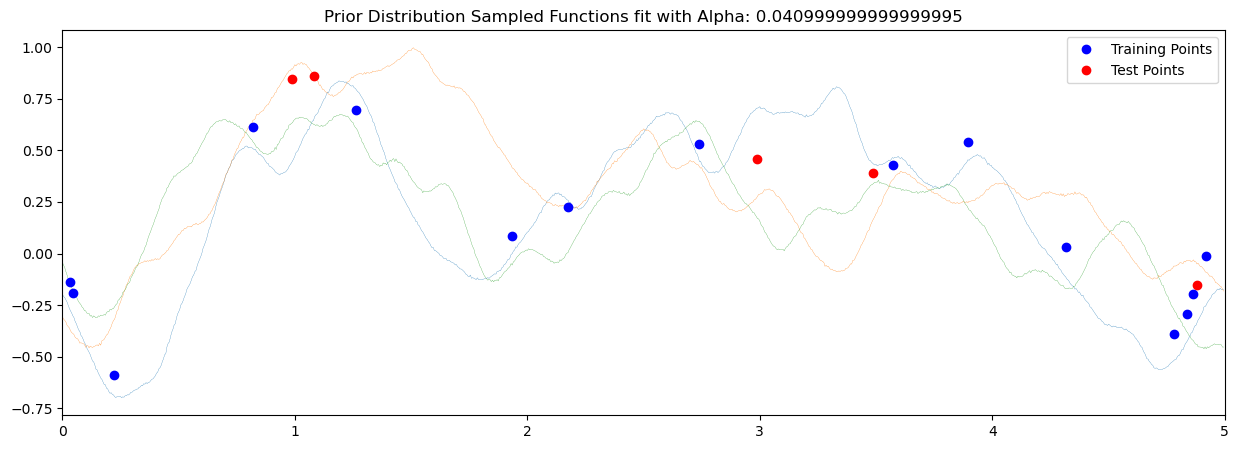

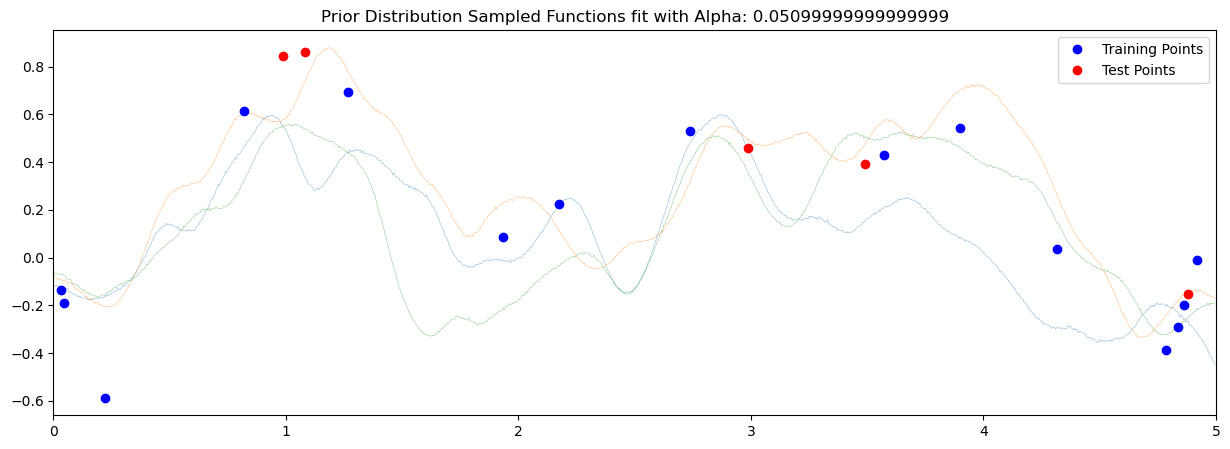

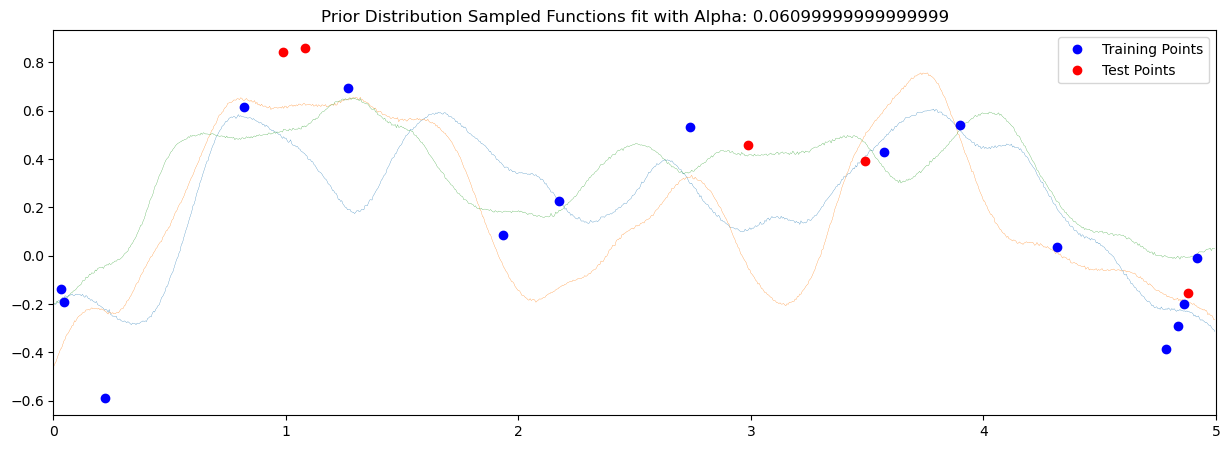

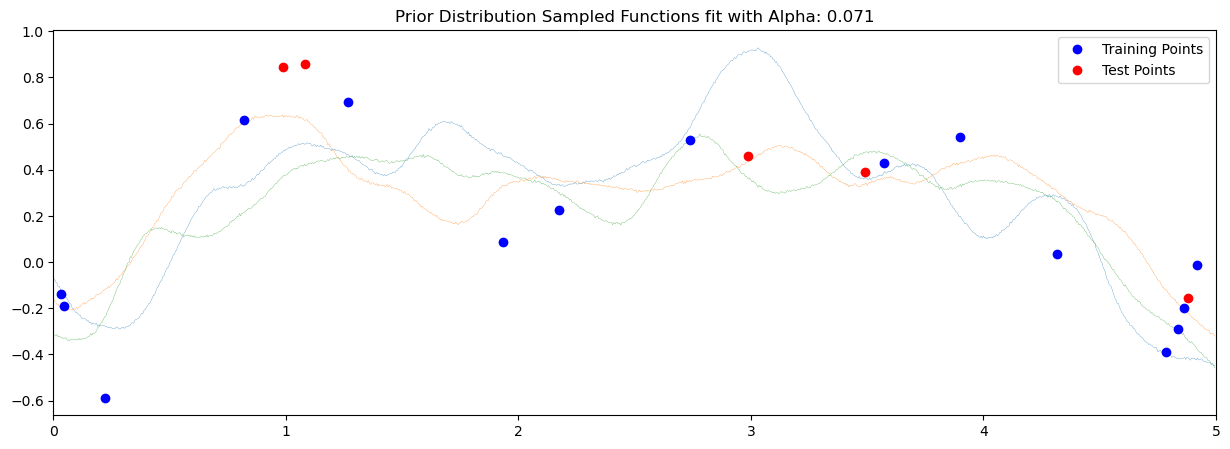

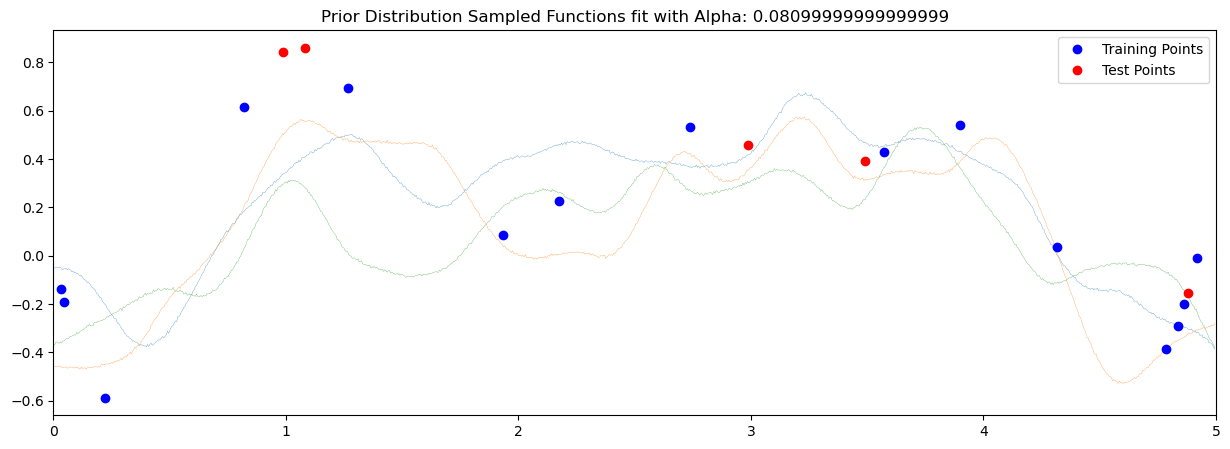

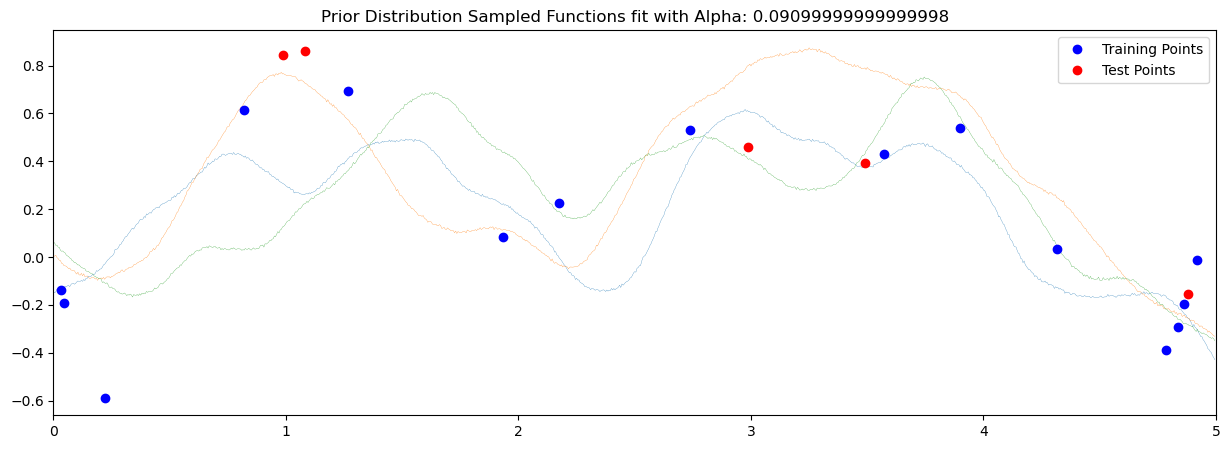

In [35]:
alpha = np.arange(10**-3, 10**-1, 10**-2)
X_sample = np.arange(0,5,0.005).reshape(-1, 1)

for a in alpha:
    model = GaussianProcessRegressor(kernel=kernel, random_state=rng, alpha=a)

    model.fit(X_train, y_train)
    y_sample = model.sample_y(X_sample, 3, rng)

    plt.figure(figsize=(15,5)) #making wider so more visible
    plt.plot(X_sample, y_sample, lw=0.2)
    plt.plot(X_train, y_train, "bo", label="Training Points")
    plt.plot(X_test, y_test, "ro", label="Test Points")
    plt.legend()
    plt.title(f"Prior Distribution Sampled Functions fit with Alpha: {a}")
    plt.xlim(0, 5)